# Flare 2011-08-06
# Fe 6302 $\AA$

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [2]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [3]:
def i_filename(i=0, element="Fe5576"):
    if element == "Fe5576" and i>= 0 and i<= 78:
      if i<10:
        return f'crisp_l2_flare_090005_5576_r0000{i}.fits'
      elif i>=10 and i < 100:
        return f'crisp_l2_flare_090005_5576_r000{i}.fits'        
    elif element == 'Fe6302'and i>= 0 and i<= 78:
      if i<10:
        return f'crisp_l2_flare_090005_6302_r0000{i}.fits'
      elif i>=10 and i < 100:
        return f'crisp_l2_flare_090005_6302_r000{i}.fits'    
    else:
        raise ValueError(f'Given wrong parameters {i=}, {element=}')

def timeframe_to_filename_fits(frame):
    return "fits/Fe/"+i_filename(frame, "Fe6302")
ttff = timeframe_to_filename_fits

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    wvl = io[1].data 
    print(wvl)
    print(io)
    print(np.shape(io[0].data), io[0].data[0,:,500,500])
    
np.save('line_data/wav_Fe6302.npy', wvl-2.3)

[6303.5761 6303.6201 6303.6641 6303.7081 6303.7521 6303.7961 6303.8401
 6303.8841 6303.9281 6303.9721 6304.0161 6304.0601 6304.1041 6304.1481
 6304.1921 6304.2361 6304.2801 6304.3241 6304.3681 6304.4121 6304.4561
 6304.5001 6304.5441 6304.5881 6304.6321 6304.6761 6304.7201 6304.7641
 6304.8081 6304.8521]
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001FD20973290>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001FD20976AD0>]
(4, 30, 1031, 1028) [489 461 431 382 317 274 271 293 318 347 365 384 401 407 411 407 408 405
 390 364 319 303 297 298 315 343 353 341 310 314]


In [5]:
head0 = f.getheader(ttff(0))
head7 = f.getheader(ttff(78))
print(head0["DATE-AVG"], head7["DATE-AVG"])
s = head0["DATE-AVG"]
s[11:23]

2011-08-06T09:00:05.00000 2011-08-06T09:36:52.3999


'09:00:05.000'

In [6]:
head0

SIMPLE  =                    T / Written by IDL:  Tue Sep  1 12:21:37 2015      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    4 / Number of data axes                            
NAXIS1  =                 1028 /                                                
NAXIS2  =                 1031 /                                                
NAXIS3  =                   30 /                                                
NAXIS4  =                    4 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2015-09-01'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
EXTNAME = 'Fe_I_6302'          /                                                
SOLARNET=             0.5000

In [7]:
time_list = []
for i in range(79):
    time_list.append(f.getheader(ttff(i))["DATE-AVG"][11:23])
time_list

['09:00:05.000',
 '09:00:33.300',
 '09:01:01.600',
 '09:01:29.900',
 '09:01:58.200',
 '09:02:26.500',
 '09:02:54.800',
 '09:03:23.100',
 '09:03:51.400',
 '09:04:19.700',
 '09:04:48.000',
 '09:05:16.300',
 '09:05:44.600',
 '09:06:12.900',
 '09:06:41.200',
 '09:07:09.500',
 '09:07:37.800',
 '09:08:06.099',
 '09:08:34.400',
 '09:09:02.700',
 '09:09:31.000',
 '09:09:59.300',
 '09:10:27.600',
 '09:10:55.900',
 '09:11:24.200',
 '09:11:52.500',
 '09:12:20.800',
 '09:12:49.100',
 '09:13:17.400',
 '09:13:45.700',
 '09:14:14.000',
 '09:14:42.300',
 '09:15:10.600',
 '09:15:38.900',
 '09:16:07.199',
 '09:16:35.500',
 '09:17:03.799',
 '09:17:32.100',
 '09:18:00.400',
 '09:18:28.700',
 '09:18:57.000',
 '09:19:25.299',
 '09:19:53.600',
 '09:20:21.900',
 '09:20:50.200',
 '09:21:18.500',
 '09:21:46.799',
 '09:22:15.100',
 '09:22:43.399',
 '09:23:11.700',
 '09:23:40.000',
 '09:24:08.299',
 '09:24:36.600',
 '09:25:04.899',
 '09:25:33.200',
 '09:26:01.500',
 '09:26:29.799',
 '09:26:58.100',
 '09:27:26.399

fits/Fe/crisp_l2_flare_090005_6302_r00000.fits
s=(30, 1031, 1028)
the shape of the data is (79, '??', 30, 1031, 1028)
the wavelengths are self._wavel = array([6301.2761, 6301.3201, 6301.3641, 6301.4081, 6301.4521, 6301.4961,
       6301.5401, 6301.5841, 6301.6281, 6301.6721, 6301.7161, 6301.7601,
       6301.8041, 6301.8481, 6301.8921, 6301.9361, 6301.9801, 6302.0241,
       6302.0681, 6302.1121, 6302.1561, 6302.2001, 6302.2441, 6302.2881,
       6302.3321, 6302.3761, 6302.4201, 6302.4641, 6302.5081, 6302.5521])
(1031, 1028) (1031, 1028)
Boundary
Blue=Outside, yellow=Inside


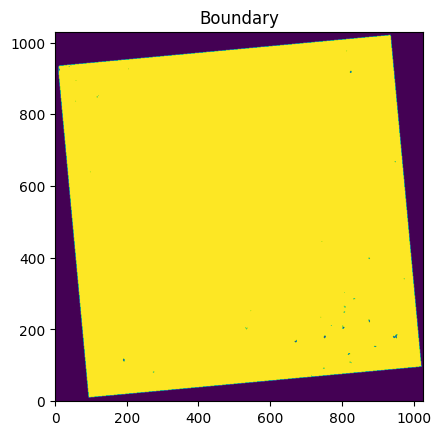

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


((),
 array([[[442, 442, 442, 442],
         [507, 482, 442, 442]],
 
        [[272, 272, 272, 272],
         [219, 223, 272, 272]],
 
        [[372, 372, 372, 372],
         [434, 417, 372, 372]],
 
        [[385, 385, 385, 385],
         [439, 420, 385, 385]],
 
        [[335, 335, 335, 335],
         [320, 325, 335, 335]],
 
        [[353, 353, 353, 353],
         [408, 381, 353, 353]]], dtype='>i2'))

In [8]:
reload(un)
Fe = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_Fe6302.npy', number_of_frames=79,
                 time=time_list, name_of_line='Fe6302_2011', thresh=[0, 100000],  boundary_methode='search', 
                 boundary_arguments = {"error":0.05}, with_stokes=True)

# Fe.datacube
np.shape(Fe.datacube), Fe.datacube(0)[0:30:5,10:20:5, 100:200:30]


In [9]:
Fe.calculate__FOV_spect_over_time()

In [10]:
secs = un.get_TIME(Fe)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{Fe.shape=}')

the mean cadence is 28.29487179487177 for this line!
Fe.shape=(79, '??', 30, 1031, 1028)


[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]
The guessed filters are [[4.5, 3.75], [14.5, 3.75], [24.5, 3.75]]


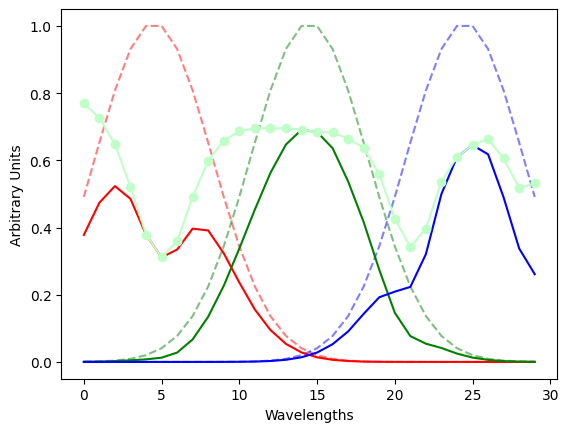

In [11]:
# %matplotlib inline
gf = un.guess_filters(15)
print(gf)
Fe.update_filters(None)# [[3,2], [7,2], [11,2]]
Fe.plot_filt(880,900)
plt.show()

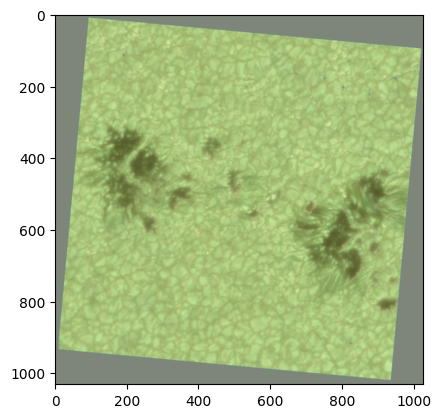

(1031, 1028, 3)


In [13]:
# %matplotlib widget
for frame in range(0,Fe._number_of_frames, 100):
    # frame=0
    Fe.ccp_frame(frame,Show=False)
    plt.imshow(Fe.current_ccp, origin='lower')
    plt.imshow(Fe.calculate_boundary(frame=frame), alpha=0.2)

    # plt.imshow(Fe.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Fe.current_ccp))#,np.shape(Fe.boundary))

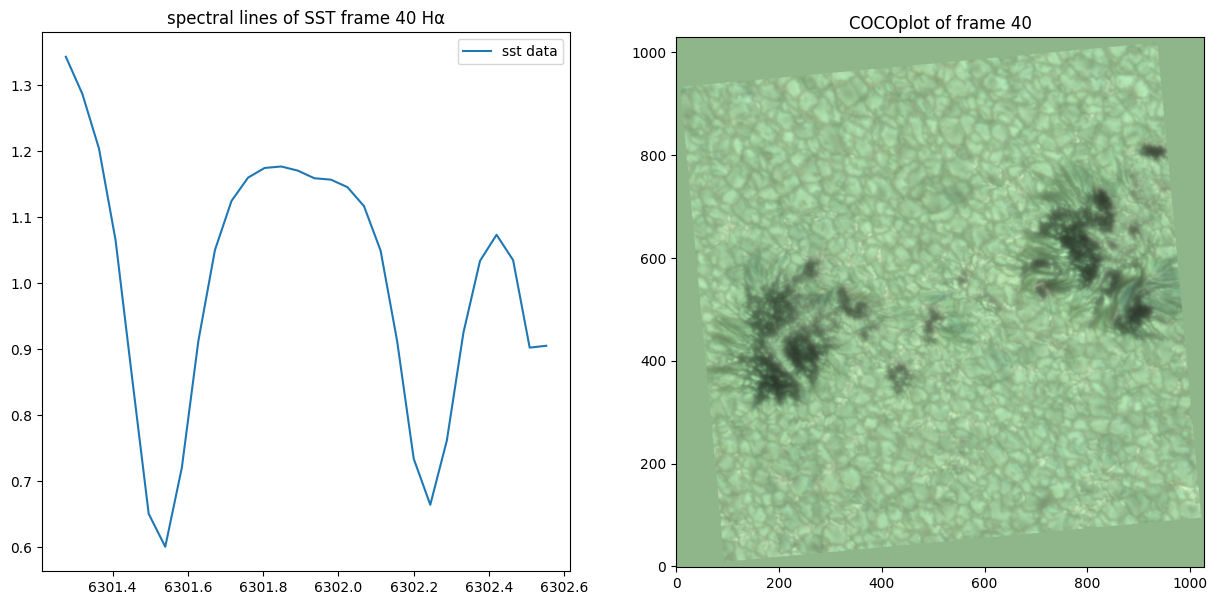

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Fe.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Fe.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

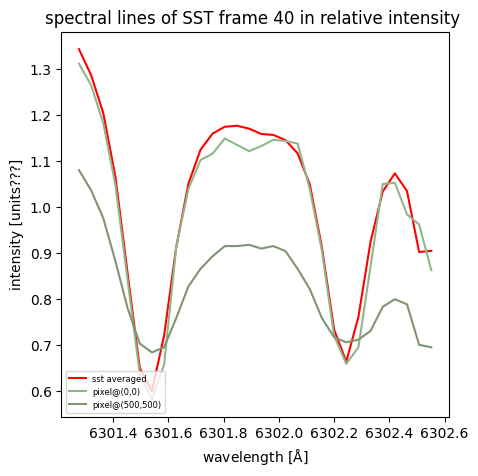

In [15]:
Fe.current_ccp[0:30:10,0:60:20,:]
Fe.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

In [17]:
print('Updated sys.path:', sys.path)
atlas = f.getdata('E:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
atlas

Updated sys.path: ['e:\\solar flares\\data\\2011-08-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'E:/solar flares/data/2017-09-06']


array([0.91304463, 0.91184324, 0.88306457, ..., 1.0017935 , 1.0030575 ,
       1.0040228 ], dtype='>f4')

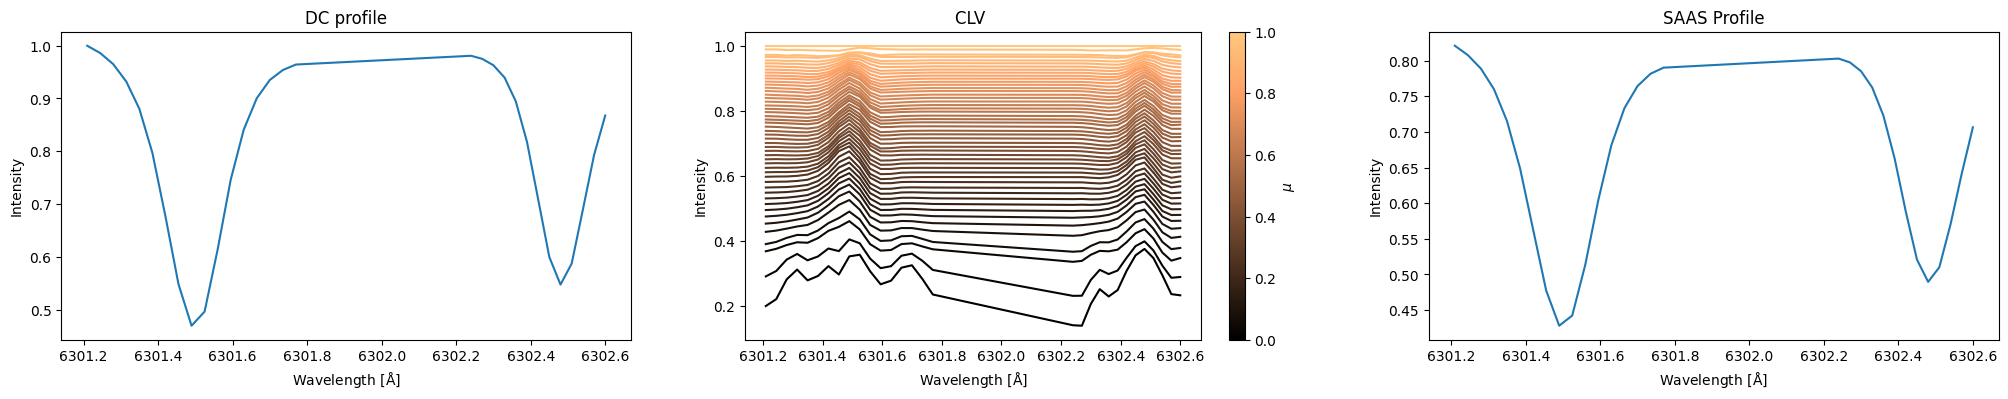

crisp::read_reflectivity: (RL,RH)[6301.717145026642] = (0.8387266881116745, 0.935625112345129)


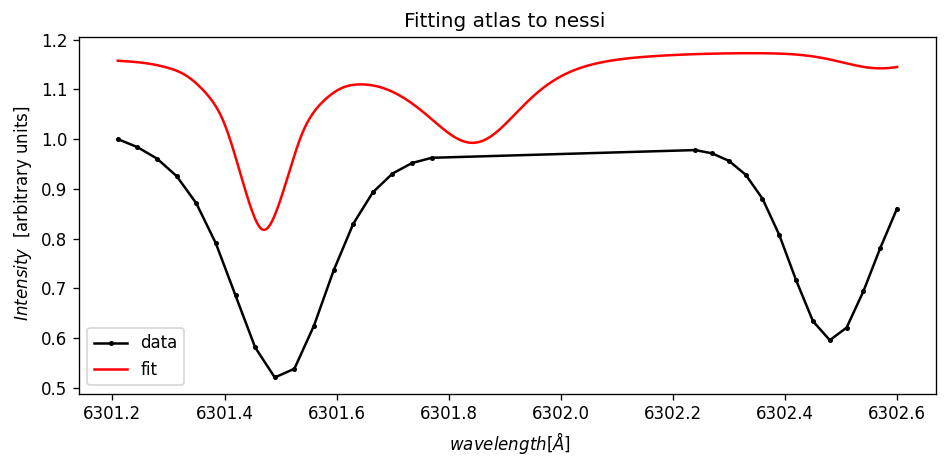

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1757.5061019306102
        x: [ 5.090e-01  0.000e+00  1.176e+00]
      nit: 3
      jac: [ 8.049e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 3.306e-06  0.000e+00  0.000e+00]
            [ 0.000e+00  1.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 252
     njev: 60
de p-waarde is  5.460815635172625e-05 
Chi^2 reduced= 65.0928185900226 
aantal vrijheidgraden= 27 
chi^2= 1757.5061019306102
we behouden de fit tot op een betrouwbaarheidsniveau van  5.460815635172625e-05 
Oftewel verwerp als p-waarde <lpha-niveau 


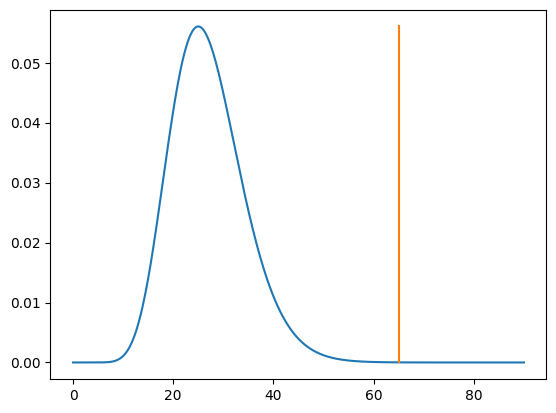

4940


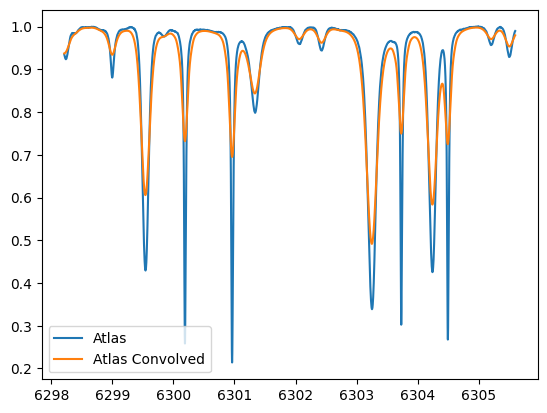

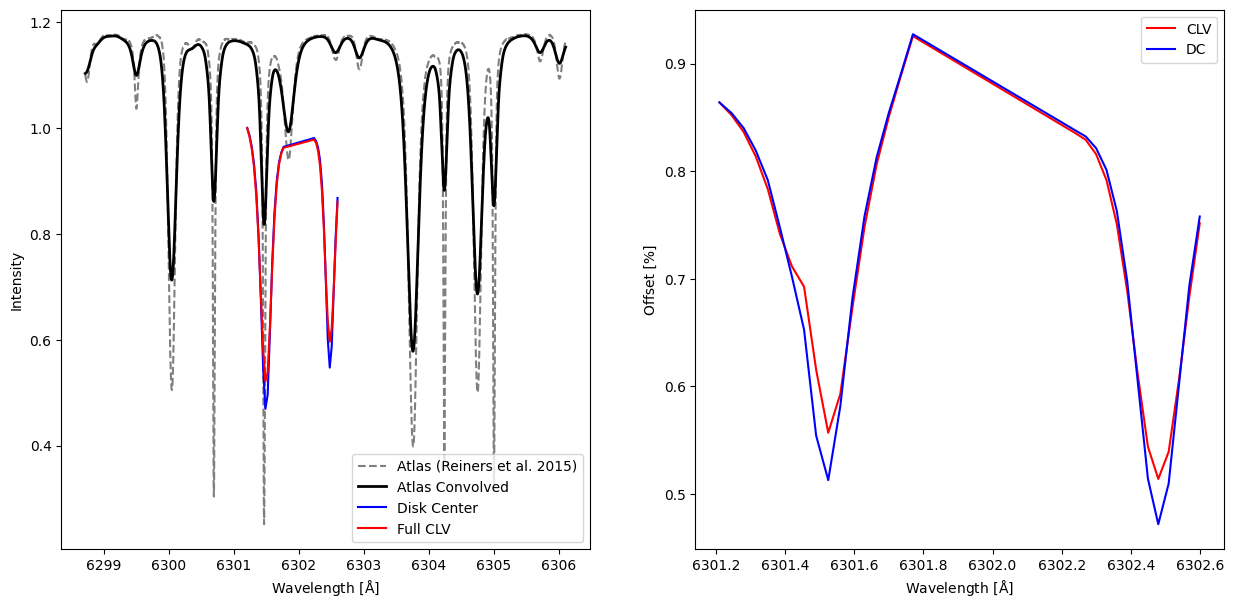

6301.717145026642 6301.892645026643


In [18]:

theor_Fe = un.linestudier('E:/solar flares/data/2017-09-06/fits/6301_clv.fits', atlas=atlas, nr=101, neglect_atlas=False)
theor_Fe.saas_profile_atlas_check(show_all=True)
print(np.median(theor_Fe.sst_wav), np.mean(theor_Fe.sst_wav))

## Calculating the $\mu$ !!!!! 


In [19]:
Fe.shape

(79, '??', 30, 1031, 1028)

In [20]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Fe.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            x=hdu.header['CRVAL1']
            y= hdu.header['CRVAL2']
            
            print(f"{x =}, {y=}")
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x =-358.975, y=-359.308


[-388.975, -328.975, -389.308, -329.308]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8480815924234666 for timeframe 0


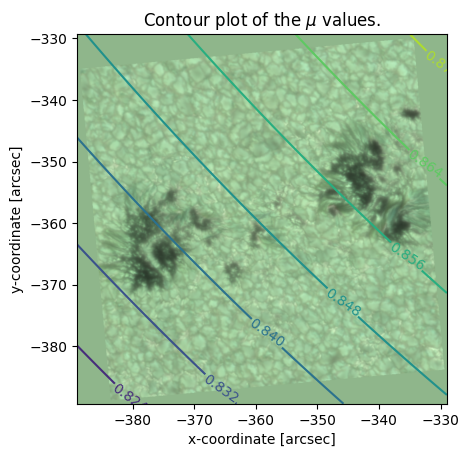

In [21]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 60

position = (x, y)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Fe.shape[4])
y = np.linspace(fyp[0], fyp[1], Fe.shape[3])

X, Y = np.meshgrid(x, y)

MU = calculate_mu(X,Y)


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        av_mu = np.average(MU, weights=over.boundary)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

    if over is not None:
        return av_mu
    
mu = give_mu_contourplot(MU, X, Y, fxp, over=Fe)

sst_data = Fe
theor_line = theor_Fe
set_mu(Fe, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Fe.index_mu], theor_line.sst_clv[theor_Fe.index_mu][0], clv_fit(mu, theor_line)


## Finding a suitable quiet sun patch

In [22]:
scaler = Fe.scalar
frame, Fe.shape

(40, (79, '??', 30, 1031, 1028))

In [23]:
# def qs_visualization(sst_data, frame, xlim, ylim):
#     fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

#     sst_data.ccp_frame(frame,Show=False)


#     ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
#     Fe.frame_integrated_spect(frame)
#     ax[0].plot(Fe._wavel, Fe.av_spect/scaler, label='sst data')
#     ax[0].plot(theor_Fe.sst_wav, theor_Fe.saas_profile, label='saas nessi')
#     ax[0].legend()
#     ax[1].imshow(sst_data.current_ccp, origin='lower')
#     ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]])
#     ax[1].set_title("COCOplot of frame "+str(frame))
#     plt.show()

# def quiet_sun(sst_data, frame, xlim, ylim, show=False, color='blue'):
#     sst_data.quiet_sun = [frame, xlim, ylim]
#     sst_data.quiet_spect=sst_data.area_av_spect(frame, xlim, ylim)
#     sst_data.ccp_frame(frame, Show=False)
#     plt.imshow(sst_data.current_ccp, origin='lower')
#     plt.plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

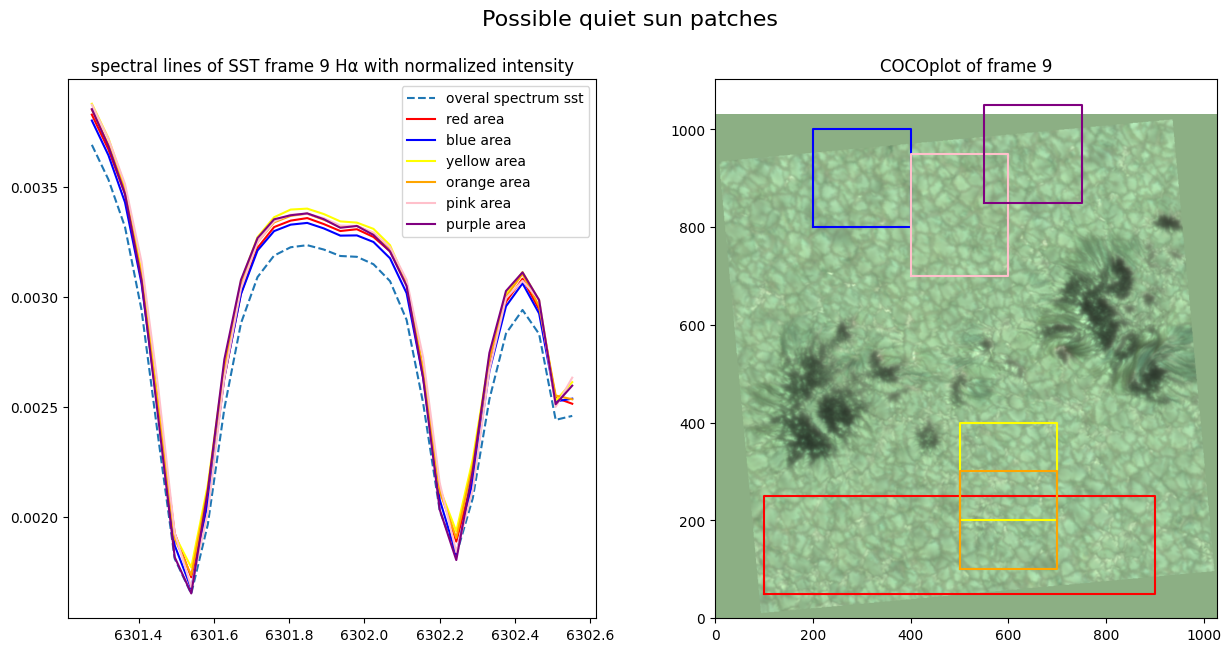

In [24]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Fe.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(100,900),(50,250)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(500,700),(100,300)], [(400,600),(700,950)], 
     [(550,750),(850, 1050)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Fe.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Fe._wavel, Fe.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Fe.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [25]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (500, 700) and ylim: (100, 300)


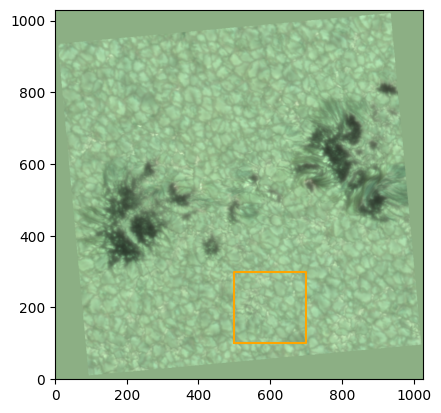

In [26]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Fe.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)


[1.51806764e-06 1.39632722e-06 1.24203909e-06 1.15556404e-06
 1.21320804e-06 1.06246020e-06 1.01054132e-06 1.55449396e-06
 1.78823209e-06 1.68031993e-06 1.55010790e-06 1.50611759e-06
 1.39860540e-06 1.35983030e-06 1.39901280e-06 1.34785115e-06
 1.33123253e-06 1.28972697e-06 1.18855661e-06 1.09631252e-06
 1.08196055e-06 1.17750149e-06 1.25454176e-06 1.63881875e-06
 1.71054122e-06 1.52728484e-06 1.38270301e-06 1.28841076e-06
 1.10871661e-06 1.16411455e-06]


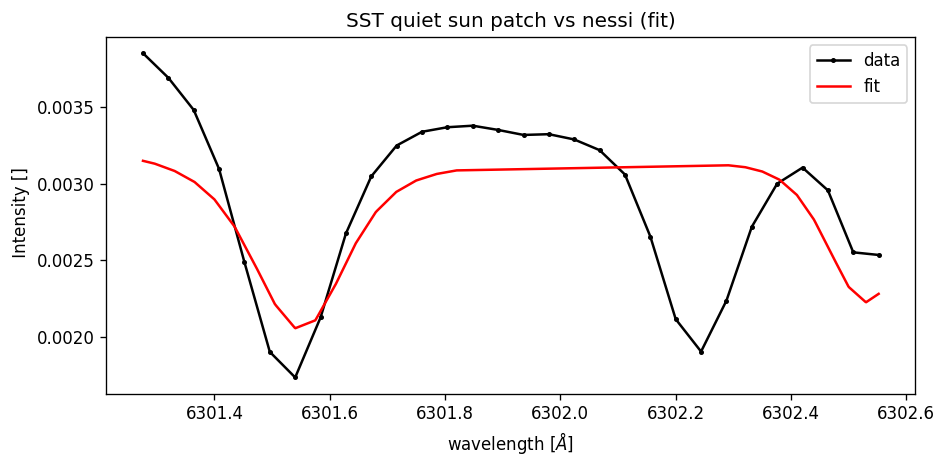

de p-waarde is  0.0 
Chi^2 reduced= 25300.598694458677 
aantal vrijheidgraden= 27 
chi^2= 683116.1647503843
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


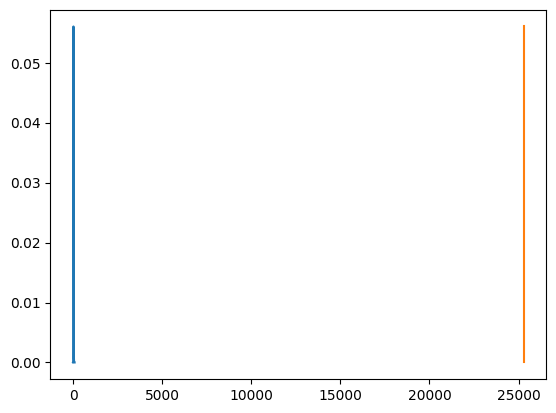

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 683116.1647503843
        x: [ 5.045e-02  1.017e-03  2.332e-03]
      nit: 21
      jac: [ 1.018e+05  1.057e+06  7.055e+05]
 hess_inv: [[ 1.610e-10 -4.858e-13  4.642e-13]
            [-4.858e-13  8.417e-12 -1.063e-11]
            [ 4.642e-13 -1.063e-11  1.396e-11]]
     nfev: 368
     njev: 89

In [27]:
import data_analysis as da
# theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
# theta = [0.2, 0.3, 0.89]

f_nessi_clv = lambda theta: interp1d(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")


g = len(Fe._wavel)

# dY = np.where(theor_Fe.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_Fe.sst_wav, 0.01, 10)

#To simulate a specific domain around the well we cam make the errors on the wings huge
avs = Fe.frame_integrated_spect(Fe.quiet_sun['frame'], Fe.quiet_sun['xlim'], Fe.quiet_sun['ylim'], variation=True)
stds = Fe.var_spect/(400*230)**0.5
print(stds)
data = [Fe._wavel,  avs /scaler,stds/scaler,np.zeros(g)+0.01]

mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=np.array([0, 0, 1 ]), fout_model=None, plot=False)
                                                                #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = mini['x']
Fe.theta_nessi_to_quiet_sun = theta
da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="SST quiet sun patch vs nessi (fit)",labelx="wavelength $[\AA]$",
             labely=" Intensity []" , error=False)
da.kwaliteit_fit(data, mini)

mini

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

[1.34102138 1.28508611 1.20373456 1.06548112 0.85795916 0.65274681
 0.60128515 0.71838467 0.91070499 1.04845814 1.12375192 1.15962522
 1.17412777 1.17653431 1.16984148 1.15803309 1.15621629 1.14499852
 1.11718203 1.04970044 0.91305511 0.73501155 0.66478164 0.76131017
 0.92426721 1.03324946 1.07224817 1.03301132 0.89661233 0.90004146] 2.7306518951052202e-08 363.7939003521967


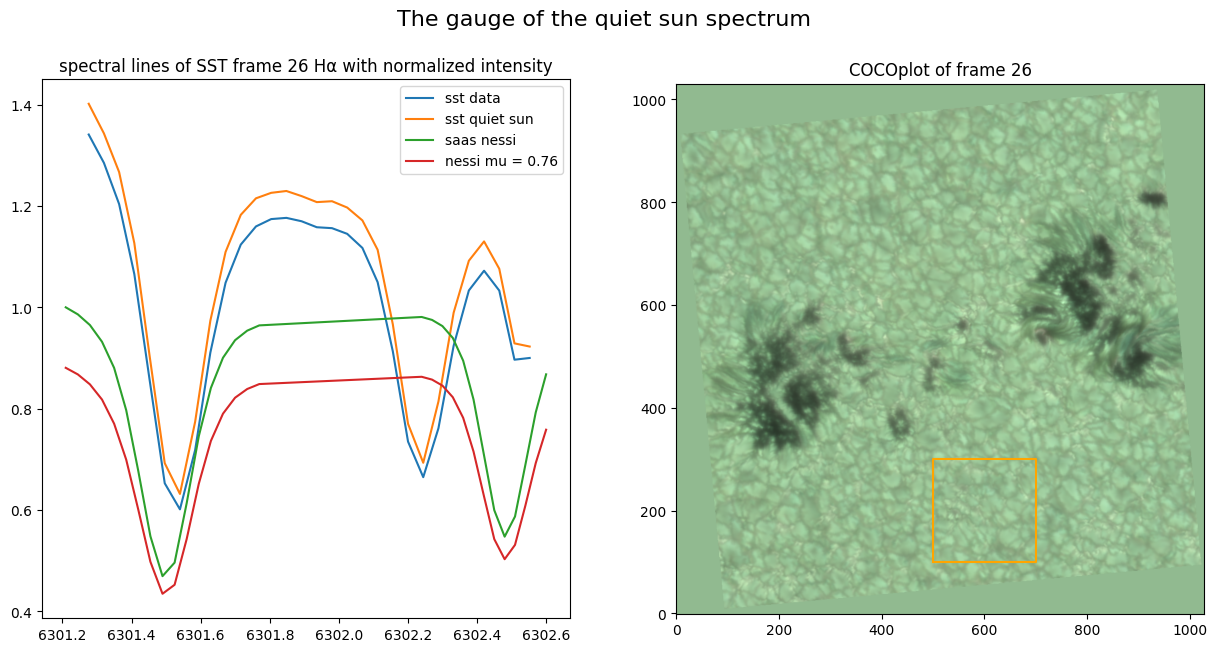

In [45]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

Fe.ccp_frame(frame,Show=False)

theta = [0,0,1]
print(Fe.av_spect, scaler, Fe.scalar)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect, label='sst data')
ax[0].plot(Fe._wavel, Fe.quiet_spect, label='sst quiet sun') #

ax[0].plot(theor_Fe.sst_wav + theta[0], f_nessi(theta)(theor_Fe.sst_wav + theta[0]), label='saas nessi')
ax[0].plot(theor_Fe.sst_wav + theta[0], f_nessi_clv(theta)(theor_Fe.sst_wav + theta[0]), label='nessi mu = 0.76')
ax[0].legend()
ax[1].imshow(Fe.current_ccp, origin='lower')
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

In [29]:
reload(un)

<module 'use_nessi3' from 'E:\\solar flares/data/2017-09-06\\use_nessi3.py'>

[6301.26009999 6301.2761     6301.29509999 6301.3201     6301.33009999
 6301.3641     6301.36509999 6301.40009999 6301.4081     6301.43509999
 6301.4521     6301.47009999 6301.4961     6301.50509999 6301.54009999
 6301.5401     6301.57509999 6301.5841     6301.61009999 6301.6281
 6301.64509999 6301.6721     6301.68009999 6301.71509999 6301.7161
 6301.75009999 6301.7601     6301.78509999 6301.8041     6301.82009999
 6301.8481     6301.8921     6301.9361     6301.9801     6302.0241
 6302.0681     6302.1121     6302.1561     6302.2001     6302.2441
 6302.2881     6302.29009999 6302.32009999 6302.3321     6302.35009999
 6302.3761     6302.38009999 6302.41009999 6302.4201     6302.44009999
 6302.4641     6302.47009999 6302.50009999 6302.5081     6302.53009999
 6302.5521     6302.56009999 6302.59009999 6302.62009999 6302.65009999] [6301.2761 6301.3201 6301.3641 6301.4081 6301.4521 6301.4961 6301.5401
 6301.5841 6301.6281 6301.6721 6301.7161 6301.7601 6301.8041 6301.8481
 6301.8921 6301.9361 

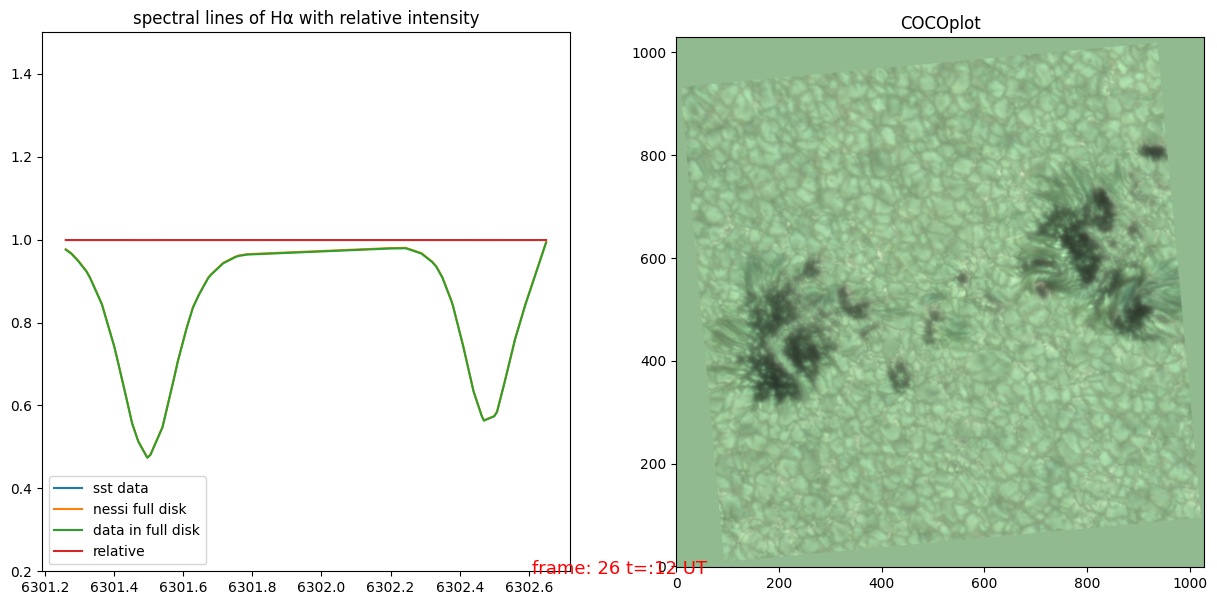

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# line_quiet_sun, = ax[0].plot(Fe._wavel, Fe.quiet_spect/scaler, label='quiet sun spectr')
Fe.frame_integrated_spect(frame)
Fe.ccp_frame(frame,Show=False)


theor_line = theor_Fe
sst_data = Fe
wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])
print(wav, sst_data._wavel, theor_line.sst_wav)

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(sst_data._wavel, sst_data.av_spect/sst_data.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=Fe.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# Fe.ccp_frame(frame,Show=False)
Fe_tstr=(f"Fe t={Fe._time[frame][0:-7]} UT")

Fe_tstr=Fe_tstr[2:5]+Fe_tstr[7:15]+Fe_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: "+str(frame)+Fe_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc*theor_Fe.sst_clv[12] + theta[1], label='nessi mu = 0.76')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print(sst_full, f_nessi(theta)(wav), wav, theta, )
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(Fe.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [31]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 -0.011482535655323603 		 this is an increase of  -904.3413421544753 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 -0.11482535655323603 		 this is an increase of  -9043.413421544752 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [32]:
sst_data = Fe
Fe.shape

(79, '??', 30, 1031, 1028)

In [33]:
Fe.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Felpha line

In [34]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (500, 700), 'ylim': (100, 300), 'color': 'orange'}

E:\solar flares/data/2017-09-06\use_nessi3.py:1696: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
E:\solar flares/data/2017-09-06\use_nessi3.py:1687: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
E:\solar flares/data/2017-09-06\use_nessi3.py:1684: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])
E:\solar flares/data/2017-09-06\use_nessi3.py:1684: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain fro

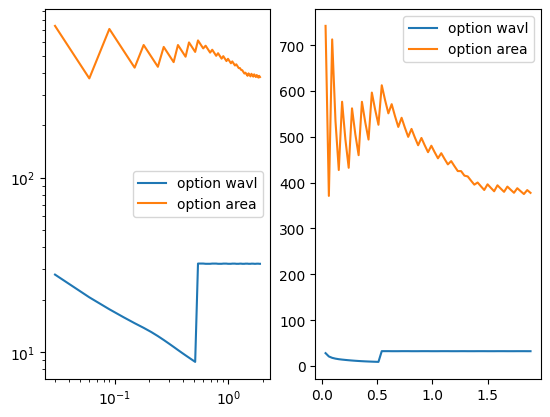

STD_Area = array([1484.51418132,  742.25709066,  371.12854534,  712.72898816,
        534.54674111,  427.6373929 ,  576.65340121,  494.2743439 ,
        432.49005091,  562.2363913 ,  506.01275217,  460.01159288,
        576.50488153,  532.15835218,  494.14704131,  596.63356616,
        559.34396828,  526.44138191,  612.5784889 ,  580.3375158 ,
        551.32064001,  571.34385415,  545.37367896,  521.66177988,
        541.64459428,  519.97881051,  499.97962549,  517.34693057,
        498.87025447,  481.66783191,  497.61082645,  481.55886431,
        466.5101498 ,  480.64195769,  466.50542952,  453.17670296,
        464.32699829,  451.77761996,  439.88873522,  447.10633526,
        435.92867688,  425.29627013,  425.22340844,  415.33449197,
        413.62908417,  404.43732675,  395.64521095,  400.3553012 ,
        392.01456575,  384.01426849,  396.46419683,  388.69038905,
        381.21557387,  394.29498743,  386.9932284 ,  379.95698789,
        391.42529954,  384.55818903,  377.92787542,

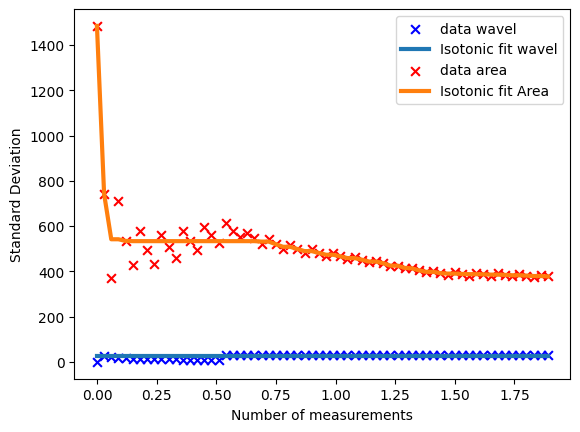

E:\solar flares/data/2017-09-06\use_nessi3.py:1761: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.03\AA$.
at an intesity of -1.2215183115806587e-07. For a standard deviation of 742.2570906598578.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=1.08\AA$.
at an intesity of -3.3873650825372617e-06. For a standard deviation of 26.650529534937313.



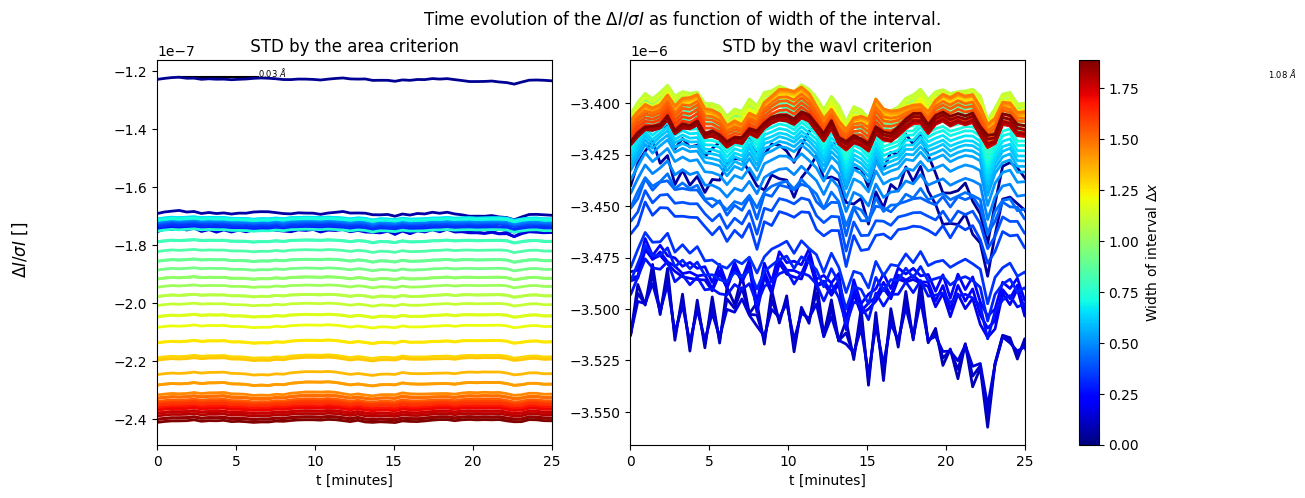

E:\solar flares/data/2017-09-06\use_nessi3.py:1929: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


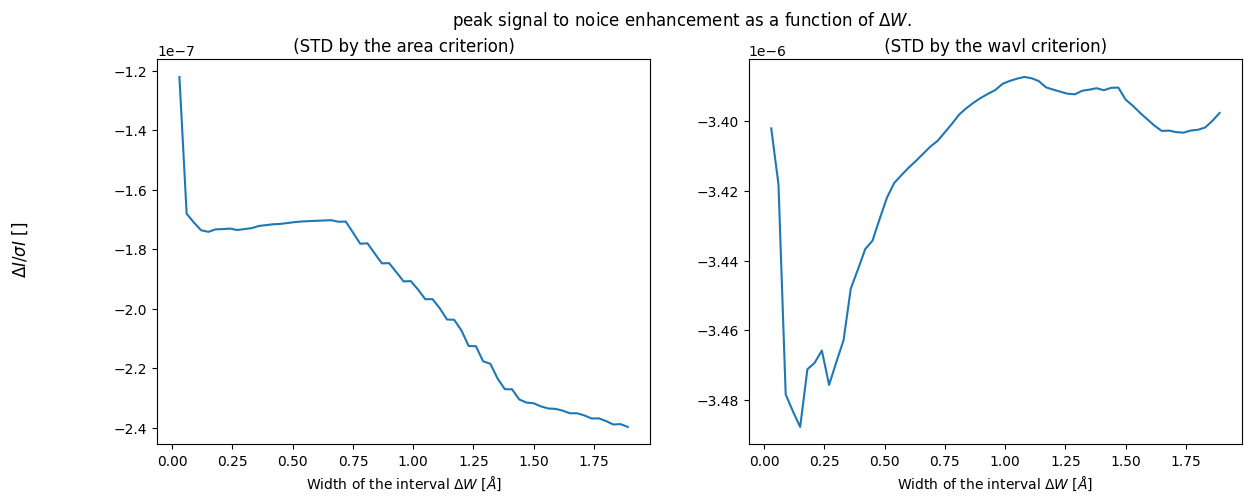

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-1.22911115e-07, -1.22559104e-07, -1.22276852e-07, ...,
         -1.23199389e-07, -1.23158163e-07, -1.23818465e-07],
        [-1.69196041e-07, -1.68628576e-07, -1.68350751e-07, ...,
         -1.69577274e-07, -1.69500913e-07, -1.70505829e-07],
        ...,
        [-2.40196859e-07, -2.39903078e-07, -2.39676181e-07, ...,
         -2.39153232e-07, -2.39339388e-07, -2.42100208e-07],
        [-2.40115932e-07, -2.39803668e-07, -2.39599618e-07, ...,
         -2.39000967e-07, -2.39212488e-07, -2.41922014e-07],
        [-2.41210538e-07, -2.40888866e-07, -2.40690915e-07, ...,
         -2.39949409e-07, -2.40161654e-07, -2.42860555e-07]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-3.42325830e-06, -3.41345427e-06, -3.40559314e-06, ...,
         -3.43128716e-06, -3.43013897e

In [35]:
reload(un)
un.analyse_optimal_interval(sst_data=Fe, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

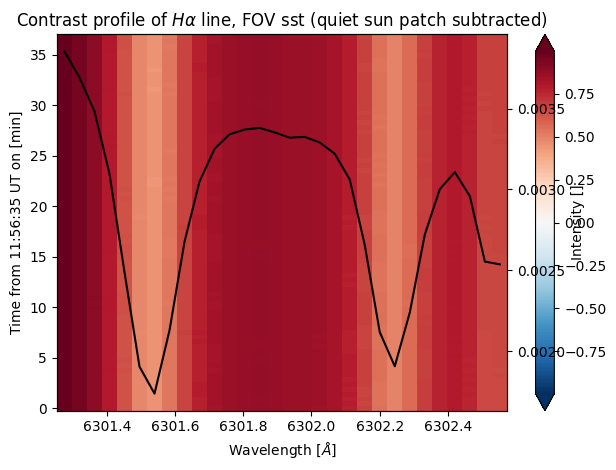

In [36]:
FOV_spectrum = Fe.FOV_spectrum
QS = sst_data.quiet_spect/sst_data.scalar
Z = FOV_spectrum - QS
x = sst_data._wavel
y = Fe.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

For FOV with Nessi normalisation (of course fit to the quiet sun patch)

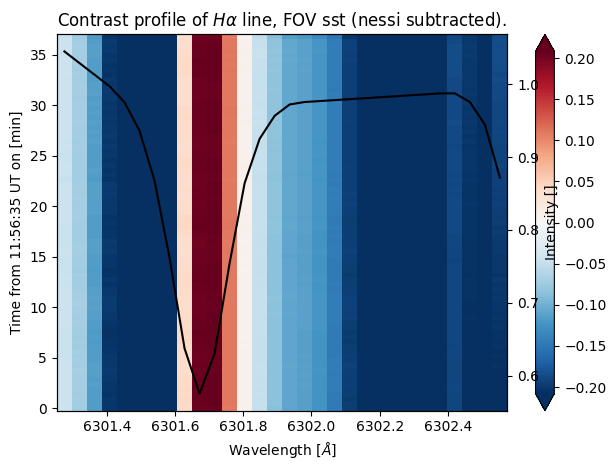

In [37]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_Fe

f_nessi_clv = interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
sst_data = Fe
QS = f_nessi_clv(sst_data._wavel)

Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The longer stripes here on the contrast plot come from the differences between nessi en quiet sun which was not an as good fit as hoped

### For the full disk profile

(79, 30) [1.         0.957242   0.89627763 0.79438109 0.63972086 0.48670701
 0.44742805 0.53467149 0.67800272 0.78035916 0.83621808 0.86281135
 0.87368623 0.87544652 0.8703783  0.86176703 0.86055181 0.85219328
 0.83133683 0.78167215 0.68068175 0.54783733 0.49511169 0.56653543
 0.68830289 0.76876554 0.79675548 0.76458011 0.65762625 0.66096418] [6301.2761 6301.3201 6301.3641 6301.4081 6301.4521 6301.4961 6301.5401
 6301.5841 6301.6281 6301.6721 6301.7161 6301.7601 6301.8041 6301.8481
 6301.8921 6301.9361 6301.9801 6302.0241 6302.0681 6302.1121 6302.1561
 6302.2001 6302.2441 6302.2881 6302.3321 6302.3761 6302.4201 6302.4641
 6302.5081 6302.5521]


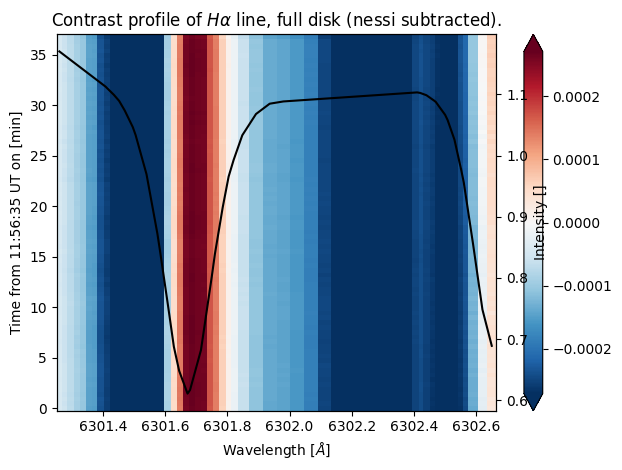

In [38]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_Fe
sst_data = Fe

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

print(np.shape(FOV_spectrum), FOV_spectrum[0], sst_data._wavel)
# print([(interp1d(sst_data._wavel, FOV_spectrum[0], kind='linear', fill_value="extrapolate")(wav)) for i in range(np.shape(FOV_spectrum)[0])])
# print(f_sst(wav))

areafactor = 60**2 / (np.pi*950**2)


# relative = sst_full / f_nessi(theta)(wav)


QS_clv = f_nessi_clv(theta)(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

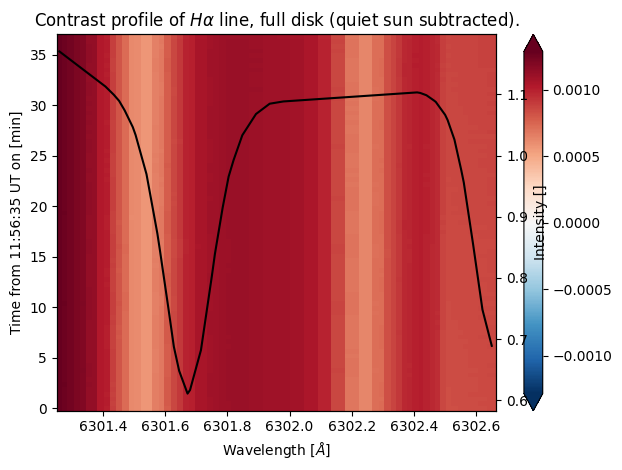

In [39]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_Fe
sst_data = Fe

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_sun_patch_clv = interp1d(sst_data._wavel, sst_data.quiet_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

QS_from_qs_patch = f_sun_patch_clv(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - QS_from_qs_patch)

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_from_qs_patch)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (quiet sun subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








In [40]:
import scipy

def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(sst_data._number_of_frames):
        DS = areafactor * (interp1d(sst_data._wavel, sst_data.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW


The equivalent width calculated in its difference to nessi 

In [41]:
wav

array([6301.26009999, 6301.2761    , 6301.29509999, 6301.3201    ,
       6301.33009999, 6301.3641    , 6301.36509999, 6301.40009999,
       6301.4081    , 6301.43509999, 6301.4521    , 6301.47009999,
       6301.4961    , 6301.50509999, 6301.54009999, 6301.5401    ,
       6301.57509999, 6301.5841    , 6301.61009999, 6301.6281    ,
       6301.64509999, 6301.6721    , 6301.68009999, 6301.71509999,
       6301.7161    , 6301.75009999, 6301.7601    , 6301.78509999,
       6301.8041    , 6301.82009999, 6301.8481    , 6301.8921    ,
       6301.9361    , 6301.9801    , 6302.0241    , 6302.0681    ,
       6302.1121    , 6302.1561    , 6302.2001    , 6302.2441    ,
       6302.2881    , 6302.29009999, 6302.32009999, 6302.3321    ,
       6302.35009999, 6302.3761    , 6302.38009999, 6302.41009999,
       6302.4201    , 6302.44009999, 6302.4641    , 6302.47009999,
       6302.50009999, 6302.5081    , 6302.53009999, 6302.5521    ,
       6302.56009999, 6302.59009999, 6302.62009999, 6302.65009

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_5456\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


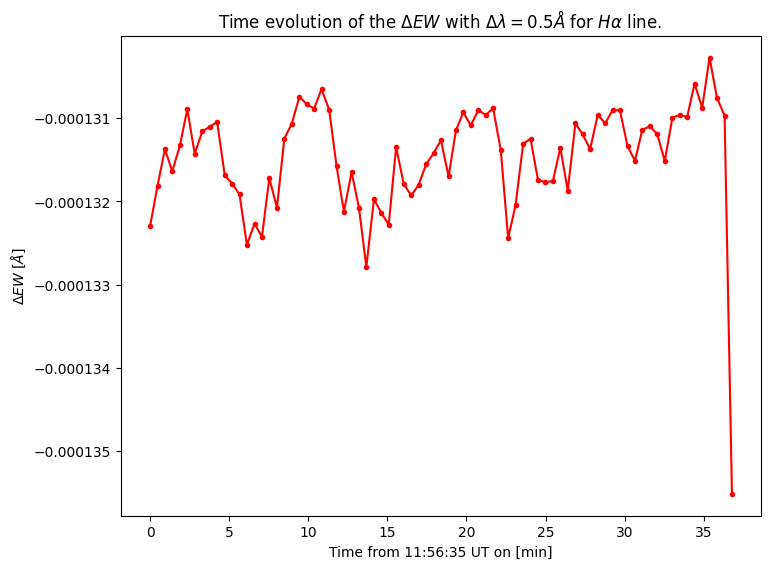

In [42]:
DEW = differenced_equivalent_width(sst_data = Fe, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav[1:-4], Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
ax1.plot(TIME, DEW, '-o', color='r', label=r'$\Delta EW$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line. ')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend()
plt.show()

The equivalent width calculated in its difference to the quiet sun patch

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_5456\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


[-0.00013229251610145815, -0.0001318106854845837, -0.0001313724512521216, -0.00013163683893530173, -0.0001313265723133727, -0.0001308900905425462, -0.0001314279228500563, -0.00013115632456045938, -0.00013110153908945128, -0.000131044067664884, -0.0001316853566697222, -0.00013178389500634156, -0.00013191595324953055, -0.0001325203510649746, -0.00013226662835211407, -0.00013242530827917352, -0.00013172127238308745, -0.00013207376334032115, -0.00013124479000750067, -0.0001310659053695543, -0.00013074122029120824, -0.00013082952018186297, -0.00013088332982463956, -0.00013065004779310336, -0.00013089456845856345, -0.00013157258100083476, -0.0001321219306718638, -0.0001316457657473657, -0.0001320755512844857, -0.0001327875721945997, -0.0001319731105032422, -0.00013213716539521808, -0.00013228004651754597, -0.00013134553448963286, -0.00013179121880258193, -0.00013192673398525534, -0.00013180285816845796, -0.00013155190560515167, -0.00013142202137218429, -0.00013126494992735764, -0.00013169898

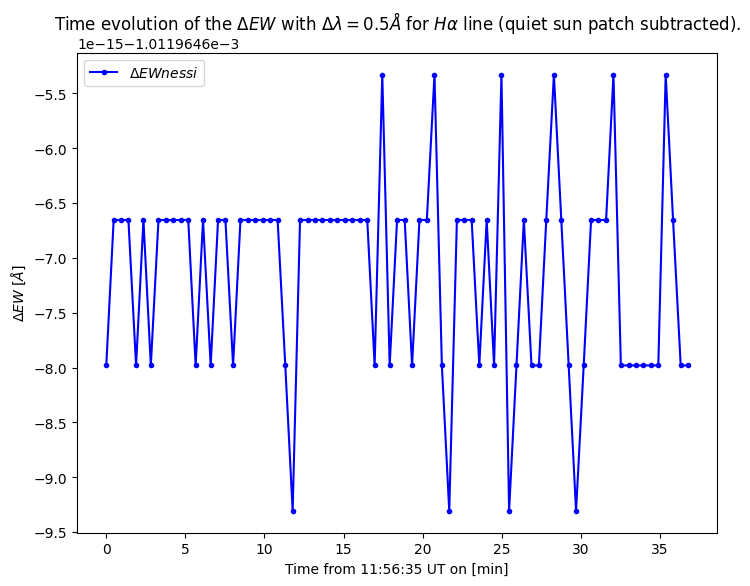

In [43]:
DEW2 = differenced_equivalent_width(sst_data = Fe, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_sun_patch_clv, wav=wav[1:-4], Dlambda= 0.5)
# DEW = differenced_equivalent_width(sst_data = Fe, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
print(DEW, DEW2)
# ax1.plot(TIME, DEW2 - np.min(DEW2)+0.00001, '-o', color='r', label=r'$\Delta EW$ QSP', markersize=3)
# ax1.plot(TIME, DEW - np.min(DEW), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.plot(TIME, np.array(DEW) - np.array(DEW2), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line (quiet sun patch subtracted).')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend
ax1.legend()
plt.show()

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?

bring it to the disk center scale it en than put it on its spot again wit center to limb variation

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [75] at time ['t=09:35:27 UT'].


ValueError: theta[1]=0.0010165384960838803 should be zero!

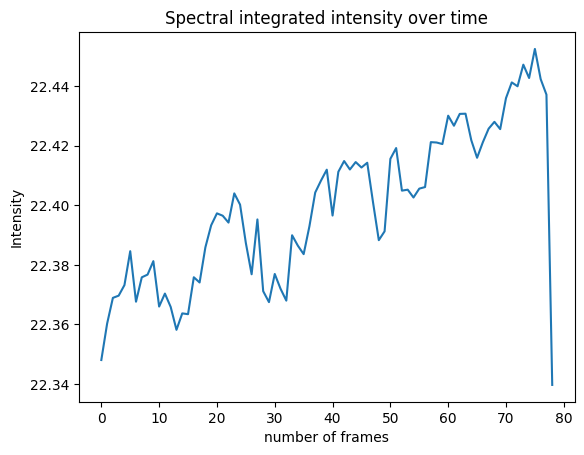

In [44]:
un.save_for_further_analysis(Fe, theor_Fe)


# Movie Making

frame: 0, 08:34:05.827440, total number of frames: 453 


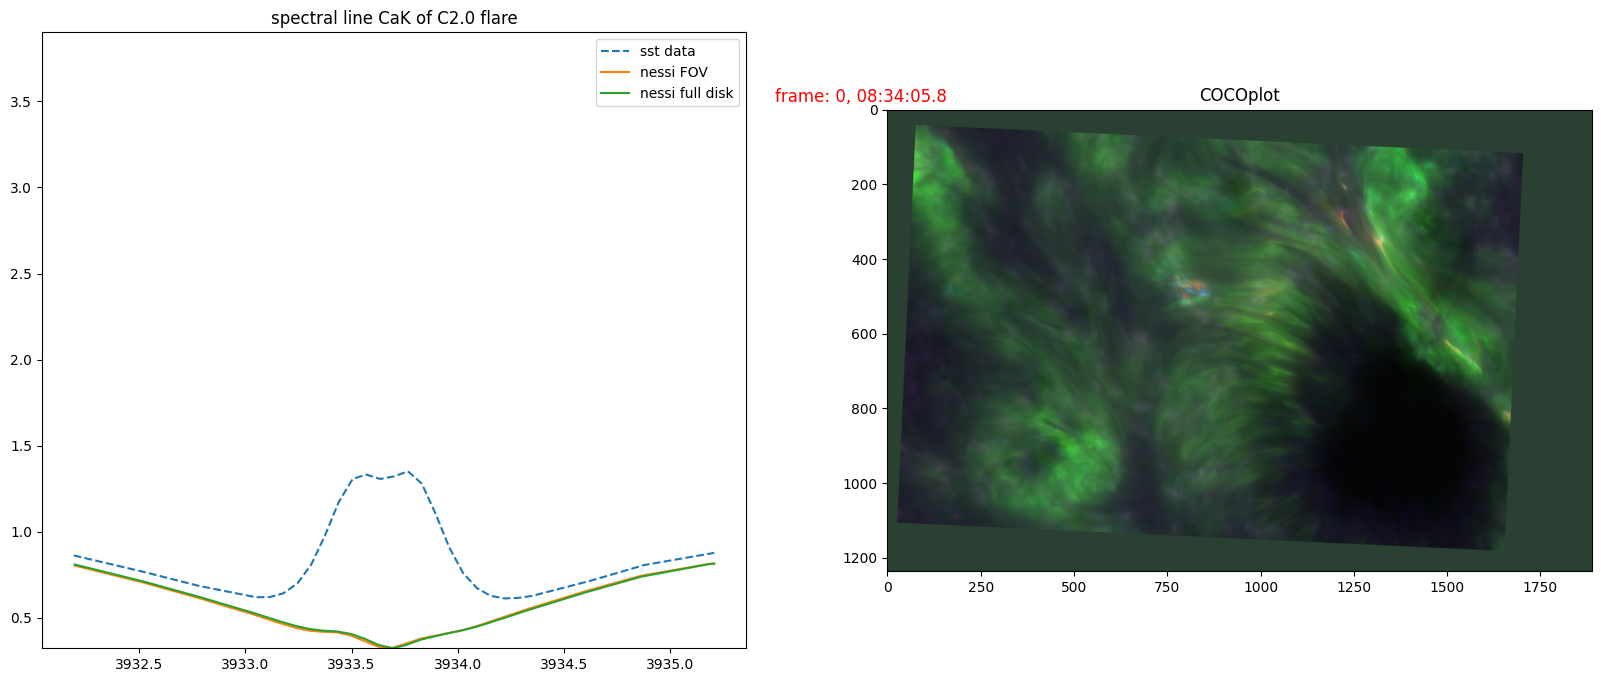

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 

In [ ]:
# fill in here all arguments
theor_line = theor_line
sst_data = Fe
name_of_flare = "C4.1"
name_of_line = "Fe6302"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
exit()